# Ordinary Least Squares Regression Task

__Equivalent to maximizing the likelihood function for the case of i.i.d noise in a one-dimensional time series__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#Given two 1D arrays X and Y of equal size, the function ols(X,Y) returns the tuple (m,b) corresponding to the 
#slope (m) and intercept (b) of the best fit linear model Y = mX+b

def ols(X,Y):
    X_mean=np.mean(X)
    Y_mean=np.mean(Y)
    
    l=len(X)
    
    num=0
    den=0
    for i in range(l):
        num += (X[i]-X_mean) * (Y[i]-Y_mean)
        den += (X[i]-X_mean) ** 2
        
    m=num/den
    b=Y_mean - (m*X_mean)
    
    return (m,b)

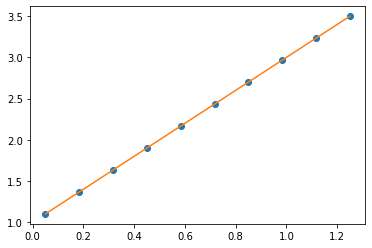

In [16]:
#Sanity Check
x=np.linspace(0.05,1.25,10)
y=2*x+1
p1=plt.plot(x, y, "o")

m,b=ols(x,y)

linear_plot=plt.plot(x, m*x+b)

m = 3.120763554043758 , b = -0.3009246135504835


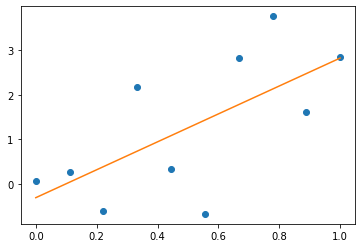

In [25]:
#Testing the model on i.i.d noise, akin to a biased Brownian particle
x=np.linspace(0.,1.,10)
s=np.random.randn(10)
y=2*x+s
p1=plt.plot(x, y, "o")

m,b=ols(x,y)
print("m =",m,", b =",b)

linear_plot=plt.plot(x, m*x+b)

m = 1.9531951871561015 , b = 0.02889763916710264


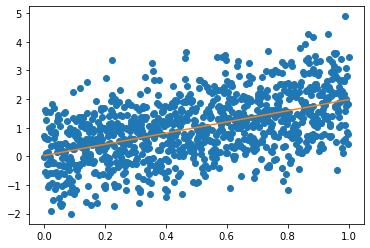

In [28]:
#This is probably the ideal playground to understand influence of noise, sampling, and intrinsic model parameters

sample_size=1000
noise_level=1
m_true=2
b_true=0

x=np.linspace(0.,1.,sample_size)
s=noise_level * np.random.randn(sample_size)
y=m_true*x+b_true+s
p1=plt.plot(x, y, "o")

m,b=ols(x,y)
print("m =",m,", b =",b)

linear_plot=plt.plot(x, m*x+b)

Increasing sample size decreases estimation errors

m = 1.641913522984781 , b = -0.5351982725090021


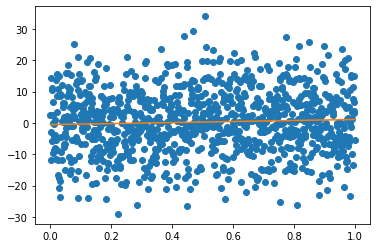

In [29]:
sample_size=1000
noise_level=10
m_true=2
b_true=0

x=np.linspace(0.,1.,sample_size)
s=noise_level * np.random.randn(sample_size)
y=m_true*x+b_true+s
p1=plt.plot(x, y, "o")

m,b=ols(x,y)
print("m =",m,", b =",b)

linear_plot=plt.plot(x, m*x+b)

Increasing noise level increases estimation errors

m = 19.595345928564065 , b = 0.1473758489594541


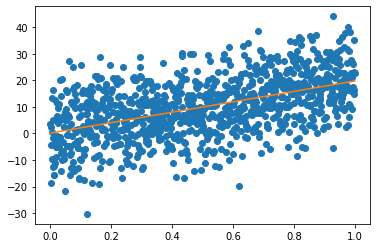

In [30]:
sample_size=1000
noise_level=10
m_true=20
b_true=0

x=np.linspace(0.,1.,sample_size)
s=noise_level * np.random.randn(sample_size)
y=m_true*x+b_true+s
p1=plt.plot(x, y, "o")

m,b=ols(x,y)
print("m =",m,", b =",b)

linear_plot=plt.plot(x, m*x+b)

Modulating parameters of the underlying model that generates data